# Fruits Classifier

The goal of this notebook/project is to classify fruits based on the [fruits kaggle dataset](https://www.kaggle.com/datasets/moltean/fruits) using Pytorch🔥

To succesfully classify the images we'll need to accomplisht the following

1. View sampling of the images and get an understanding of how the variation in the images.
2. Collect and label the images. Currently, the labels for each image is the folder in which they are stored. Consequently, we'll need to organize them in a more suitable format.
3. Create a neural net to classify these images
4. Evaluate the performance of the neural net
5. Use a pretrained neural net to make predictions
6. Evaluate the pretrained neural net

In [176]:
# Required imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2 as cv
from pathlib import Path
import torch
import torch.nn as nn
import torchvision
from PIL import Image
from torchvision import datasets, transforms
import seaborn as sns
import torch.nn.functional as F

In [5]:
os.listdir(os.getcwd())[0]

'fruits-360'

In [64]:
def get_image(fruit: str, position: int):
    path = os.getcwd() + '/fruits-360/Training/' + fruit
    images = os.listdir(path)
    images_filtered = [img for img in images if img[0] != 'r']
    img = path + '/' + images_filtered[position]
    return cv.imread(img)

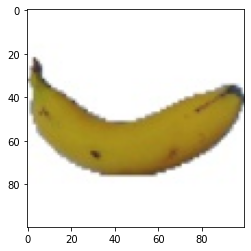

In [56]:
# Learning how to display an image
img = get_image('Banana', 2)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)  # the default for OpenCV is in BGR
plt.imshow(img)

For this project, I don't believe we need to manipulate the coloring of the images as that'll only hinder in the classification, so now we'll move onto preparing the data for pytorch.

In [89]:
# Labeling the different fruits
fruits_path = os.getcwd() + '/fruits-360/Training'
fruits = os.listdir(fruits_path)
fruit_df = pd.DataFrame(columns=['image', 'label'])
row_df = 0

for fruit in fruits:
    fruit_dir = fruits_path + '/' + fruit
    fruit_images = os.listdir(fruit_dir)
    fruit_images = [img for img in fruit_images if img[0] != 'r']
    for img in fruit_images:
        fruit_df.loc[row_df] = [fruit_dir + '/' + img, fruit]
        row_df += 1

In [98]:
fruit_df['img_arr'] = fruit_df['image'].apply(cv.imread)

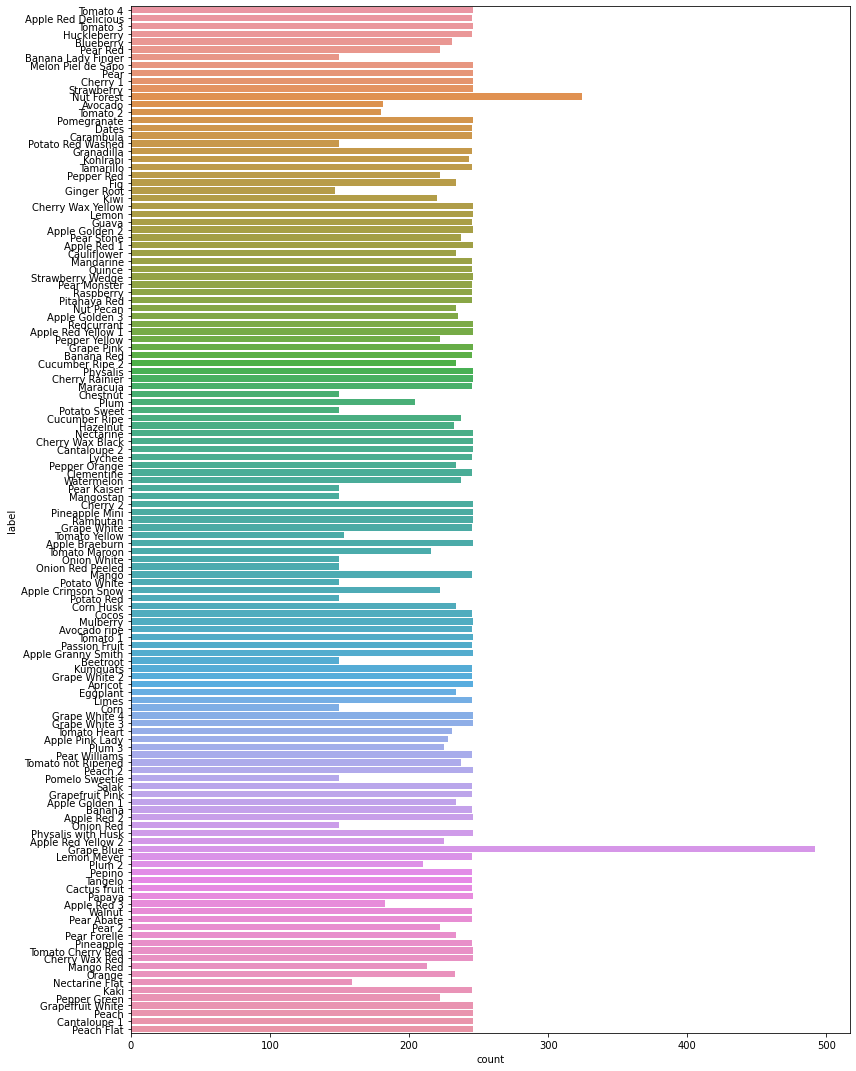

In [135]:
plt.figure(figsize=(12,15))
sns.countplot(y = fruit_df['label'])
plt.tight_layout()

## Loading the Data

In [177]:
# device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameterse
num_epochs = 4
batch_size = 4
learning_rate = 0.001

In [249]:
train_path = os.getcwd() + '/fruits-360/Training'
test_path = os.getcwd() + '/fruits-360/Test'

train_dataset = datasets.ImageFolder(train_path, transform=transforms.ToTensor())
test_dataset = datasets.ImageFolder(test_path, transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

torch.Size([4, 3, 100, 100]) torch.Size([4])


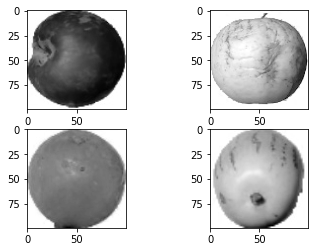

In [250]:
examples = iter(train_loader)
samples, labels = examples.next()
print(samples.shape, labels.shape)

for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(samples[i][0], cmap='gray')

In [263]:
# Creating the CNN:
class ConvNet(nn.Module):
    def __init__(self) -> None:
        super(ConvNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16*22*22, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 131)


    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [264]:
model = ConvNet()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [265]:
train_loader.batch_size

4

In [266]:
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 200 == 0:
                print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

Epoch [1/4], Step [200/16923], Loss: 4.8805
Epoch [1/4], Step [400/16923], Loss: 4.8599
Epoch [1/4], Step [600/16923], Loss: 4.8829
Epoch [1/4], Step [800/16923], Loss: 4.8790
Epoch [1/4], Step [1000/16923], Loss: 4.8579
Epoch [1/4], Step [1200/16923], Loss: 4.8710
Epoch [1/4], Step [1400/16923], Loss: 4.8723
Epoch [1/4], Step [1600/16923], Loss: 4.8471
Epoch [1/4], Step [1800/16923], Loss: 4.9002
Epoch [1/4], Step [2000/16923], Loss: 4.9291
Epoch [1/4], Step [2200/16923], Loss: 4.8722
Epoch [1/4], Step [2400/16923], Loss: 4.8083
Epoch [1/4], Step [2600/16923], Loss: 4.8922
Epoch [1/4], Step [2800/16923], Loss: 4.8931
Epoch [1/4], Step [3000/16923], Loss: 4.9642
Epoch [1/4], Step [3200/16923], Loss: 4.8397
Epoch [1/4], Step [3400/16923], Loss: 4.8140
Epoch [1/4], Step [3600/16923], Loss: 4.7912
Epoch [1/4], Step [3800/16923], Loss: 4.7985
Epoch [1/4], Step [4000/16923], Loss: 4.6836
Epoch [1/4], Step [4200/16923], Loss: 4.6244
Epoch [1/4], Step [4400/16923], Loss: 4.8025
Epoch [1/4], S

Epoch [3/4], Step [2800/16923], Loss: 0.5032
Epoch [3/4], Step [3000/16923], Loss: 2.7502
Epoch [3/4], Step [3200/16923], Loss: 0.6896
Epoch [3/4], Step [3400/16923], Loss: 0.2877
Epoch [3/4], Step [3600/16923], Loss: 0.1759
Epoch [3/4], Step [3800/16923], Loss: 0.0156
Epoch [3/4], Step [4000/16923], Loss: 0.4712
Epoch [3/4], Step [4200/16923], Loss: 0.5243
Epoch [3/4], Step [4400/16923], Loss: 0.5928
Epoch [3/4], Step [4600/16923], Loss: 0.2485
Epoch [3/4], Step [4800/16923], Loss: 0.1673
Epoch [3/4], Step [5000/16923], Loss: 0.1886
Epoch [3/4], Step [5200/16923], Loss: 0.4997
Epoch [3/4], Step [5400/16923], Loss: 0.0546
Epoch [3/4], Step [5600/16923], Loss: 0.2051
Epoch [3/4], Step [5800/16923], Loss: 0.1404
Epoch [3/4], Step [6000/16923], Loss: 0.0162
Epoch [3/4], Step [6200/16923], Loss: 0.0251
Epoch [3/4], Step [6400/16923], Loss: 0.9801
Epoch [3/4], Step [6600/16923], Loss: 0.1116
Epoch [3/4], Step [6800/16923], Loss: 0.2261
Epoch [3/4], Step [7000/16923], Loss: 1.0387
Epoch [3/4

In [268]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()
        
    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network: {acc} %')

Accuracy of the network: 74.01710155148096 %
